# Summative Assessment #1

Statistical Theory

A study was undertaken to compare the mean time spent on cell phones by male and female college students per week. Fifty male and 50 female students were selected from Midwestern University and the number of hours per week spent talking on their cell phones determined. It is desired to test $ H_0: \mu_1 = \mu_2 $ versus $ H_1: \mu_1 \neq \mu_2 $ based on these samples.

In [69]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

This is the given data set:

Hours spent talking on cellphone for males and females at Midwestern University

In [7]:
males = [12,7,7,10,8,10,11,9,9,13,4,9,12,11,9,9,7,12,10,13,11,10,6,12,11,9,10,12,8,9,13,10,9,7,10,7,10,8,11,10,11,7,15,8,9,9,11,13,10,13]
females = [11,10,11,10,11,12,12,10,9,9,9,10,8,7,12,9,7,8,9,8,7,7,9,9,12,10,9,13,9,9,10,9,6,12,8,11,8,8,11,12,9,10,11,14,12,7,11,10,9,11]

data = pd.DataFrame({
    'Males': males,
    'Females': females
})
data

,Males,Females
0,12,11
1,7,10
2,7,11
3,10,10
4,8,11
5,10,12
6,11,12
7,9,10
8,9,9
9,13,9


## (1) Rationale for Hypothesis Test

The primary objective of this study is to determine if there is a significant difference in the mean time spent on cell phones by male and female college students at Midwestern University. Knowing these variations can help with school regulations or initiatives to control screen time and encourage healthier technology use by offering insightful information about the social dynamics and communication patterns of students.

1. Defining the Research Question:

Do male and female college students spend different amounts of time talking on their cell phones per week?

A statistical comparison of the average amount of time (in hours) that male and female students spend on their phones will be used to answer this issue.

2. Establishing Hypotheses:

We define the null and alternative hypotheses in order to compare the mean times:

- Null Hypothesis ($H_0$): There is no difference in the mean time spent on cell phones by male and female students.

  In other words: $H_0: \mu_1 = \mu_2 $ 

- Alternative Hypothesis ($ H_1 $): There is a difference in the mean time spent on cell phones by male and female students.

  In other words: $H_0: \mu_1 \neq \mu_2 $

Where:
- $ \mu_1 $ represents the mean time spent on cell phones by male students.
- $ \mu_2 $ represents the mean time spent on cell phones by female students.

3. Using the Appropriate Test:

We have two independent samples, one for each gender, hence the two-sample t-test is the proper statistical test. The purpose of this test is to ascertain whether the means of two independent groups differ significantly from one another.

The two-sample t-test is ideal because:

- The data consists of interval measurements (number of hours).
- The sample sizes are equal and reasonably large (n = 50 for both groups).
- The test assumes that the two populations have equal variances, which can be verified with a variance test (if necessary).

4. Justification for the Hypothesis Test:

- It enables the researcher to draw conclusions about gender disparities in cell phone usage based on statistics rather than anecdotal or biased information.
- Comprehending the distinct patterns of cell phone usage associated with genders might aid in customizing awareness campaigns or support services, including tools for screen time management or potential overuse prevention.
- Additionally, it can support more extensive sociological studies on the effects of technology use on the lives and wellbeing of students.

We can ascertain whether additional research or focused interventions for particular student groups are required by examining the test results.

5. Criteria for Decision:
- The significance level for the hypothesis test evaluation is a = 0.05. We will reject the null hypothesis and come to the conclusion that there is a statistically significant difference in the mean amount of time spent on cell phones by male and female students if the p-value from the t-test is less than 0.05. We will fail to reject the null hypothesis and come to the conclusion that there is no significant difference in the mean timings if the p-value is higher than 0.05.




## (2) Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for the researcher?

In [31]:
t_statistic, p_value = stats.ttest_ind(males, females)
print(f"p-value: {p_value:.3f}")

p-value: 0.762


P-Value for the Test: The p-value obtained from the two-sample t-test is 0.762.

Conclusion:
- Given that the p-value exceeds the standard significance level of 
We are unable to rule out the null hypothesis when a = 0.05. This indicates that there is no statistically significant difference between male and female college students at Midwestern University in terms of the mean amount of time they spend on their phones each week.

Recommendation: 
- There is no proof that male and female college students use their phones for different lengths of time, according to the results of the hypothesis test. The researcher can draw the conclusion that both genders spend about equal amounts of time on their phones in this group. If more detailed insights are needed, it might be helpful to carry out additional research with bigger sample sizes or more variables.


## (3) Provide descriptive statistical summaries of the data for each gender category.

We can use the built it function of pandas to calculate the descriptive statistic of each gender category.

In [33]:
male_desc = data['Males'].describe()
female_desc = data['Females'].describe()
print(male_desc)
print()
print(female_desc)

count    50.000000
mean      9.820000
std       2.154161
min       4.000000
25%       9.000000
50%      10.000000
75%      11.000000
max      15.000000
Name: Males, dtype: float64

count    50.000000
mean      9.700000
std       1.775686
min       6.000000
25%       9.000000
50%       9.500000
75%      11.000000
max      14.000000
Name: Females, dtype: float64


or we can manually compute it by using some useful libraries

In [74]:
def descriptive(data):
    valid = len(data)
    mode = pd.Series(data).mode()[0]
    median = np.median(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  
    variance = np.var(data, ddof=1) 
    skewness = pd.Series(data).skew()
    std_error_skewness = np.sqrt(6 * 50 * (50 - 1) / ((50 - 2) * (50 + 1) * (50 + 3)))  # formula 
    kurtosis = pd.Series(data).kurtosis()
    std_error_kurtosis = np.sqrt((24 * 50 * (50 - 1) ** 2) / ((50 - 3) * (50 - 2) * (50 + 3) * (50 + 5)))  # formula
    minimum = np.min(data)
    maximum = np.max(data)
    p_25 = np.percentile(data, 25)
    p_50 = np.percentile(data, 50)
    p_75 = np.percentile(data, 75)
    p_90 = np.percentile(data, 90)
    p_95 = np.percentile(data, 95)

    print(f"Valid: {valid}")
    print(f"Mode: {mode:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Mean: {mean:.3f}")
    print(f"Standard Deviation: {std_dev:.3f}")
    print(f"Variance: {variance:.3f}")
    print(f"Skewness: {skewness:.3f}")
    print(f"Standard error of skewness: {std_error_skewness:.3f}")
    print(f"Kurtosis: {kurtosis:.3f}")
    print(f"Standard error of kurtosis: {std_error_kurtosis:.3f}")
    print(f"Minimum: {minimum:.3f}")
    print(f"Maximum: {maximum:.3f}")
    print(f"25th Percentile: {p_25:.3f}")
    print(f"50th Percentile: {p_50:.3f}")
    print(f"75th Percentile: {p_75:.3f}")
    print(f"90th Percentile: {p_90:.3f}")
    print(f"95th Percentile: {p_95:.3f}")

print("Descriptive Statistics of Male category")
descriptive(males)

print()

print("Descriptive Statistics of Female category")
descriptive(females)


Descriptive Statistics of Male category
Valid: 50
Mode: 9.000
Median: 10.000
Mean: 9.820
Standard Deviation: 2.154
Variance: 4.640
Skewness: -0.115
Standard error of skewness: 0.337
Kurtosis: 0.177
Standard error of kurtosis: 0.662
Minimum: 4.000
Maximum: 15.000
25th Percentile: 9.000
50th Percentile: 10.000
75th Percentile: 11.000
90th Percentile: 13.000
95th Percentile: 13.000

Descriptive Statistics of Female category
Valid: 50
Mode: 9.000
Median: 9.500
Mean: 9.700
Standard Deviation: 1.776
Variance: 3.153
Skewness: 0.134
Standard error of skewness: 0.337
Kurtosis: -0.442
Standard error of kurtosis: 0.662
Minimum: 6.000
Maximum: 14.000
25th Percentile: 9.000
50th Percentile: 9.500
75th Percentile: 11.000
90th Percentile: 12.000
95th Percentile: 12.000


## (4) What is the 95% confidence interval for the population mean of each gender category, and what is the 95% confidence interval for the difference between the means of the two populations?

In [41]:
import numpy as np
import scipy.stats as stats

mean_males = np.mean(males)
mean_females = np.mean(females)
std_males = np.std(males, ddof=1) 
std_females = np.std(females, ddof=1)
n_males = len(males)
n_females = len(females)

# 95% Confidence Interval for the mean of each gender category
conf_interval_males = stats.t.interval(
    0.95, df=n_males-1, loc=mean_males, scale=std_males/np.sqrt(n_males)
)
conf_interval_females = stats.t.interval(
    0.95, df=n_females-1, loc=mean_females, scale=std_females/np.sqrt(n_females)
)

# 95% Confidence Interval for the difference between means
# Calculate the standard error for the difference of means
se_diff = np.sqrt((std_males**2 / n_males) + (std_females**2 / n_females))

# Calculate confidence interval for difference between means
mean_diff = mean_males - mean_females
conf_interval_diff = (
    mean_diff - stats.t.ppf(0.975, df=n_males+n_females-2) * se_diff,
    mean_diff + stats.t.ppf(0.975, df=n_males+n_females-2) * se_diff
)

print(f"95% Confidence Interval for the mean of Male: {conf_interval_males}")
print(f"95% Confidence Interval for the mean of female: {conf_interval_females}")
print()
print(f"standard error for the difference of means: {se_diff}")
print(f"confidence interval for difference between means: {mean_diff:.3f}")
print(f"Difference between means, male and female respectively: {conf_interval_diff}")

95% Confidence Interval for the mean of Male: (9.207794314064703, 10.432205685935298)
95% Confidence Interval for the mean of female: (9.19535558679254, 10.20464441320746)

standard error for the difference of means: 0.3948029733361972
confidence interval for difference between means: 0.120
Difference between means, male and female respectively: (-0.6634736514965714, 0.9034736514965734)


## (5) Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.

The sample size (50 men and 50 women) is sufficient for basic statistical tests and yielded a respectably accurate estimate of the mean and standard deviation for each group, according to the current analysis. Still, there are a number of reasons why more testing and a bigger sample size might be helpful:

1. Improving Precision and Reducing Error:
- Confidence Interval Width: At -0.66 to 0.90 hours, the 95% confidence interval for the mean difference is rather broad. This width implies that the estimation of the gender-to-gender mean difference is not particularly accurate. An increased sample size would aid in reducing this range and yield a more precise approximation of the actual difference (or absence of it).
- Greater sample sizes lower standard errors, improving the reliability of the findings and lowering the possibility of Type II errors (the inability to identify a difference when one is there).

2. Assessing Robustness and Generalizability:
- Midwestern University is the only university from which the present sample is taken. Even if it sheds light on one particular population, it might not be universally applicable to college students. The results would be more broadly applicable if the samples were larger and more varied, drawn from different universities or geographical areas.
- To confirm that the observed lack of difference is not the result of random sampling error or particular attributes of the selected university, more testing with bigger samples can be conducted.

3. Considering Other Variables:
- The analysis takes gender into account as a single variable. More complex patterns of cell phone use may be shown by controlling for factors including age, socioeconomic position, academic major, and social participation.
- Researchers may get deeper insights by combining variables into a multiple regression analysis or other sophisticated statistical models if they believe that factors other than gender play a significant role in the disparities in cell phone usage.

4. Detecting Smaller Effect Sizes:
- Only significant differences are likely to be seen with a limited sample size. In the event that there is little real difference in cell phone use between men and women, a bigger sample size would be required to detect this smaller effect size with enough power.
- The small mean difference (0.12 hours) in the present analysis was not statistically significant. The test's power would rise with a bigger sample size, enabling it to identify any changes, no matter how little.

Conclusion:
Future research should consider larger sample sizes and more testing in light of the aforementioned considerations. This would raise the generalizability of findings, enhance the accuracy and dependability of estimates, and provide a clearer picture of college students' cell phone use habits.

A wider demographic and other variables could be included in the study to produce more reliable results and aid in identifying possible subgroups where variations in cell phone use may truly occur.

## (6) Make a report including the testing of the assumptions for two independent samples t-test.

When comparing the means of two independent groups, the Independent Samples t Test is used to assess if there is statistical support for a significant difference in the related population means. A parametric test is the Independent Samples t Test.

We should check the data if it passes to the assumptions of the Independent Samples t-Test. Verifying that the data meets the test's underlying assumptions is crucial. The following are the main presumptions of a two-sample independent t-test:

1.	You have one dependent variable that is measured at the continuous level.
2.	You have one independent variable that consists of two categorical, independent groups (i.e., a dichotomous variable).
3.	You should have independence of observations, which means that there is no relationship between the observations in each group of the independent variable or between the groups themselves.
4.	There should be no significant outliers in the two groups of your independent variable in terms of the dependent variable.
5.	Your dependent variable should be approximately normally distributed for each group of the independent variable.
6.	You have homogeneity of variances (i.e., the variance of the dependent variable is equal in each group of your independent variable).

1. Dependent Variable (Cell Phone Usage in Hours per Week)
- The data for cell phone usage is measured in hours per week, which is a continuous variable.

2. Independent Variable (Gender: Males and Females)
- Gender is the independent variable, consisting of two distinct categories: male and female.

3. Independence of Observations
- There is no evidence to suggest that findings are connected within or across groups, given each student was measured independently.


4. Examining the male and female groups:
- The boxplot of cell phone usage by gender shows that there are significant outliers in the male group. Specifically, there are two data points outside the normal range of values: one individual reported a cell phone usage of over 14 hours per week, and another reported usage below 4 hours. These points are considered outliers, as they fall beyond 1.5 times the interquartile range (IQR).

- In contrast, the female group shows no significant outliers, as no data points are plotted outside the whiskers. This suggests that the cell phone usage for females is more consistent compared to males, where a few participants exhibit notably higher or lower usage than the rest.

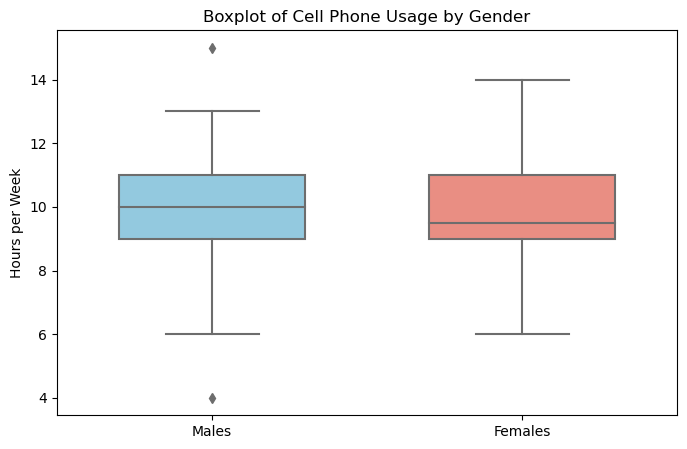

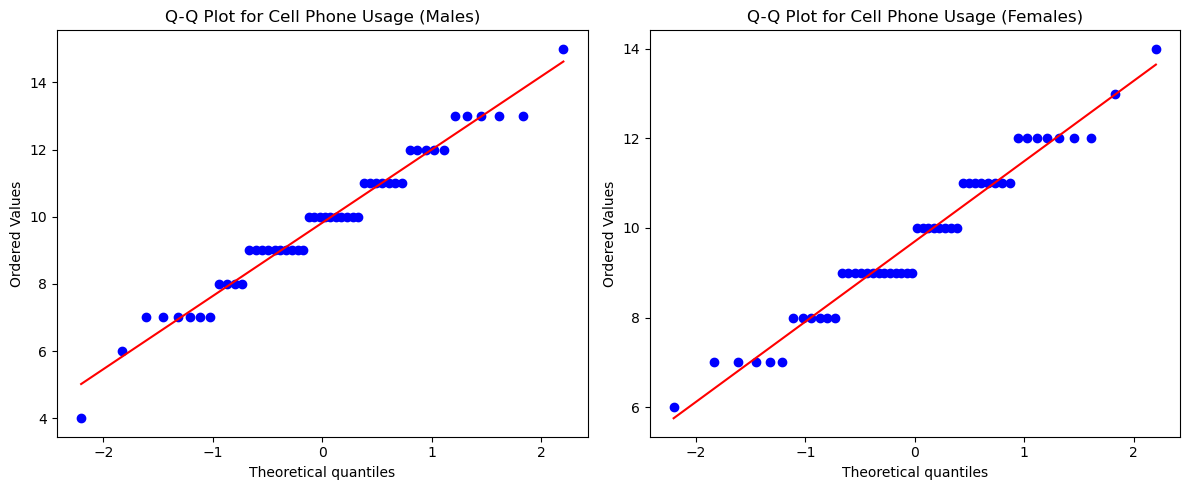

In [71]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=[males, females], palette=['skyblue', 'salmon'], width=0.6)
plt.xticks([0, 1], ['Males', 'Females'])
plt.title('Boxplot of Cell Phone Usage by Gender')
plt.ylabel('Hours per Week')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
stats.probplot(males, dist="norm", plot=plt)
plt.title('Q-Q Plot for Cell Phone Usage (Males)')

plt.subplot(1, 2, 2)
stats.probplot(females, dist="norm", plot=plt)
plt.title('Q-Q Plot for Cell Phone Usage (Females)')
plt.tight_layout()
plt.show()

The Shapiro-Wilk test was performed:
Males: p-value = 0.354
Females: p-value = 0.129 Both p-values are greater than 0.05, so we fail to reject the null hypothesis that the data follows a normal distribution. Additionally, Q-Q plots showed that the data points followed the reference line fairly well.

In [78]:
# Perform Shapiro-Wilk test for normality for both groups
shapiro_males = stats.shapiro(males)
shapiro_females = stats.shapiro(females)

print("Shapiro-Wilk Test (Males): Test Statistic = {:.3f}, p-value = {:.3f}".format(shapiro_males[0], shapiro_males[1]))
print("Shapiro-Wilk Test (Females): Test Statistic = {:.3f}, p-value = {:.3f}".format(shapiro_females[0], shapiro_females[1]))

Shapiro-Wilk Test (Males): Test Statistic = 0.975, p-value = 0.354
Shapiro-Wilk Test (Females): Test Statistic = 0.964, p-value = 0.129


In [76]:
# Perform Levene's test for equality of variances
levene_test = stats.levene(males, females)

print("Levene's Test for Equality of Variances: Test Statistic = {:.3f}, p-value = {:.3f}".format(levene_test[0], levene_test[1]))


Levene's Test for Equality of Variances: Test Statistic = 0.694, p-value = 0.407


Levene’s Test: p-value = 0.407 Since the p-value is greater than 0.05, we fail to reject the null hypothesis that the variances are equal between groups.

In [59]:
t_stat, p_value = stats.ttest_ind(males, females)

print(f"t-Statistic: {t_stat:.3f}")
print(f"p-Value: {p_value:.3f}")

print("Conclusion:")
if p_value > 0.05:
    print("The result is not statistically significant; we fail to reject the null hypothesis.")
else:
    print("The result is statistically significant; we reject the null hypothesis.")

t-Statistic: 0.304
p-Value: 0.762
Conclusion:
The result is not statistically significant; we fail to reject the null hypothesis.
